概念：
在构建量子程序时，电路处于较低的抽象层次。它们是用于构建更高抽象层次的结构，例如量子计算原语，它将来自多次量子电路执行的数据，以及先进的错误缓解技术和测量优化，积累成类型明确的经典数据和错误统计数据。

QPU：
类似于经典计算中的 CPU 或图形处理中的 GPU，QPU 是用于对量子数据运行量子运算的硬件。使用电路计算模型的 QPU 总是能够执行一些门电路和测量操作。根据具体技术，它们也可能能够运行一些实时经典计算，例如经典控制流和对经典数据的按位计算。

虚拟量子比特：
用于构建抽象电路的抽象数学量子位。虚拟量子位是人们通常从高层次思考量子算法的方式；我们假设所有量子门在所有虚拟量子位上都有效，并且所有虚拟量子位始终与其他每个虚拟量子位相连。当映射到硬件时，必须将虚拟量子位分配给硬件量子位。这种映射不必是一对一的。通常，为了满足底层 QPU 的耦合约束，一个虚拟量子位需要在电路执行过程中从一个硬件量子位交换到另一个硬件量子位。

在 Qiskit 中，电路可以按以下两种方式定义：

抽象电路：
用抽象数学运算和虚拟量子比特定义的电路。这通常是你对量子算法的理解；抽象电路可以由完全任意的幺正运算、测量以及潜在的实时经典计算组成，并且对于哪些量子比特可以相互作用没有任何限制。

您可以使用Qiskit 的转换包将抽象电路转换为物理电路。

物理电路：
一种基于硬件量子比特定义的电路，仅支持特定QPU 的ISA 指令集下可用的量子操作。物理电路与特定的 QPU 架构绑定，无法在其他不兼容的架构上运行。您可能也听说过这种电路被称为ISA 电路。

您可以使用Qiskit 的转译包将抽象电路转换为物理电路，其顶级访问点是transpile()。

逻辑量子比特
多个物理量子位的集合，由 QPU（从用户角度）共同控制，以应用实时量子纠错。逻辑量子位是Qiskit 的一种硬件量子位。

硬件量子比特
硬件量子位具有一些物理量子力学系统支持，例如超导电路；与虚拟量子位不同，它具有特定的耦合约束，并且只有某些门可以应用于某些硬件量子位组。

# NEW————QuantumCircuit类

https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.QuantumCircuit#qiskit.circuit.QuantumCircuit.append

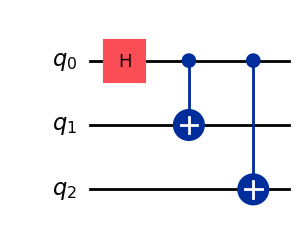

In [11]:
from qiskit import QuantumCircuit
 
# Create a circuit with a register of three qubits
circ = QuantumCircuit(3)
# H gate on qubit 0, putting this qubit in a superposition of |0> + |1>.
circ.h(0)
# A CX (CNOT) gate on control qubit 0 and target qubit 1 generating a Bell state.
circ.cx(0, 1)
# CX (CNOT) gate on control qubit 0 and target qubit 2 resulting in a GHZ state.
circ.cx(0, 2)
# Draw the circuit
circ.draw('mpl')

### 向电路添加常规操作

append()	将指令作为单个对象添加到电路中，将幺正算子直接插入到量子电路中。这会将算子转换为 UnitaryGate 对象，并将其添加到电路中。
如果算子不是幺正的，则会引发异常。可以使用 Operator.is_unitary() 函数进行检查，如果算子是幺正的，则返回 True，否则返回 False。


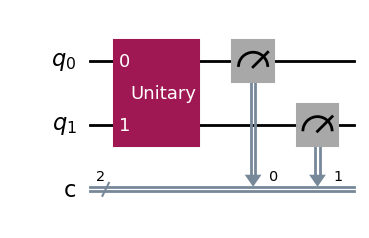

In [12]:
from qiskit.quantum_info import Pauli
from qiskit.quantum_info import Operator
XX = Operator(Pauli('XX'))
# Add to a circuit
circ = QuantumCircuit(2, 2)
circ.append(XX, [0, 1])
circ.measure([0,1], [0,1])
circ.draw('mpl')

在上面的例子中，我们用 Pauli 对象初始化了运算符。然而，Pauli 对象也可以直接插入到电路本身中，并转换为一系列单量子比特 Pauli 门：

In [13]:
circ2 = QuantumCircuit(2, 2)
circ2.append(Pauli('XX'), [0, 1])
circ2.measure([0,1], [0,1])
circ2.draw()

┌────────────┐┌─┐   
q_0: ┤0           ├┤M├───
     │  Pauli(XX) │└╥┘┌─┐
q_1: ┤1           ├─╫─┤M├
     └────────────┘ ║ └╥┘
c: 2/═══════════════╩══╩═
                    0  1

### 向电路添加标准操作

可将许多 Qiskit 标准库指令和门添加到电路中。这些方法通常相当于手动构造相关 qiskit.circuit.library 对象的实例，然后将其传递给 append()

可以方便的添加门，和一些其他非幺正操作

compose()	将一个电路中的指令内联到另一个电路中。
将参数 other（另一个电路或指令）应用到当前电路（self）的指定量子比特
other (必需)类型: QuantumCircuit 或 Instruction 说明: 要组合到当前电路上的子电路或指令。这是你想要添加的“模块”。
inplace类型: bool
说明: 这是至关重要的性能参数。
False (默认): 不修改原始电路（self），而是创建并返回一个新的组合后的电路。这是安全的，但会产生创建副本的开销。
True: 直接修改原始电路（self），组合操作在其上进行。该方法返回 None。这种方式效率高得多，尤其是对于大型电路

## 向电路添加控制流

BOX:
量子电路中的函数或子程序,一个作用域，内部的操作被当作一个整体处理
并发执行：不同的 box 可以并行执行（如果资源不冲突）

In [22]:
from qiskit.circuit import QuantumCircuit, Annotation


class MyAnnotation(Annotation):
    namespace = "my.namespace"
    
    
qc = QuantumCircuit(9)
with qc.box():
    qc.cz(0, 1)
    qc.cz(2, 3)
with qc.box([MyAnnotation()]):
    qc.cz(4, 5)
    qc.cz(6, 7)
    qc.noop(8)

for_loop
参数：
indexset :要遍历的集合
body：循环体电路（上下文管理器模式中省略，更推荐上下文模式，不需要传入body）
qubits/clbits：使用的量子/经典比特（上下文管理器模式中省略,只有显示构造时需要）

In [ ]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2, 1)
#  上下文构造
with qc.for_loop(range(5)) as i:
    qc.h(0)
    qc.cx(0, 1)
    qc.measure(0, 0)
    with qc.if_test((0, True)):
        qc.break_loop()

if_else
此方法没有关联的上下文管理器形式，因为它已由 if_test() 方法处理
if_else(condition, true_body, false_body, qubits, clbits, label=None)


if_test
有上下文格式

In [ ]:
from qiskit.circuit import QuantumCircuit, Qubit, Clbit

bits = [Qubit(), Qubit(), Qubit(), Clbit(), Clbit()]
qc = QuantumCircuit(bits)
 
qc.h(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.h(0)
qc.cx(0, 1)
qc.measure(0, 1)
 
with qc.if_test((bits[3], 0)) as else_:
    # 如果bits[3]==0成立，则执行这块
    qc.x(2)
with else_:
    # 如果不成立，则执行这块
    qc.h(2)
    qc.z(2)

switch
多分支条件判断
参数：
target:要switch的经典值。该值必须是整数。
case:可能的情况
像经典switch一样，只会执行第一个匹配的分支

In [ ]:
from qiskit.circuit import QuantumCircuit, ClassicalRegister, QuantumRegister

qreg = QuantumRegister(3)
creg = ClassicalRegister(3)
qc = QuantumCircuit(qreg, creg)
qc.h([0, 1, 2])
# 3个经典比特的值可以是 000, 001, 010, 011, 100, 101, 110, 111 中的任意一个，每个概率为 1/8。
qc.measure([0, 1, 2], [0, 1, 2])
 
with qc.switch(creg) as case: # 基于经典寄存器creg的值进行多分支判断
    with case(0):
        qc.x(0)
    with case(1, 2):  # 情况2：如果creg == 1 或 2
        qc.z(1)
    with case(case.DEFAULT):
        qc.cx(0, 1)

noop
是一个"无操作"指令，它的主要作用是显式地将一个量子比特标记为在某个作用域（如 box）中被使用，而不实际添加任何量子门操作,在控制流块外部基本无用

In [ ]:
from qiskit.circuit import QuantumCircuit
 
qc = QuantumCircuit(3)
with qc.box():
    # 仅使用量子比特0和1
    qc.cx(0, 1)
with qc.box():
    # 显式将量子比特2标记为被使用，告诉编译器：这个box需要访问qubit 2，即使不对它做任何操作
    qc.cx(0, 1)
    qc.noop(2)

while_loop


In [ ]:
from qiskit.circuit import QuantumCircuit, Clbit, Qubit
bits = [Qubit(), Qubit(), Clbit()]
qc = QuantumCircuit(bits)

with qc.while_loop((bits[2], 0)):
    qc.h(0)
    qc.cx(0, 1)
    qc.measure(0, 0)

将电路转化为instrution和gate，抽象和封装

to_instruction

to_Gate(只可以作用于量子比特，并且所有操作是幺正的)

测量操作：
measure_active和measure_all
active：仅测量电路中非空闲（实际被使用过的）量子比特，自动创建了新的经典寄存器来存储测量结果
all：测量所有量子比特，无论是否被使用过，add_bits=True：创建新的经典寄存器（默认）

measure:
在给定的量子电路中，measure 操作用于量子比特到经典比特的测量：circ.measure([0, 1], [0, 1])
第一个列表 [0, 1]：要测量的量子比特索引
第二个列表 [0, 1]：存储测量结果的经典比特索引

## 电路评价指标

创建一个示例电路：

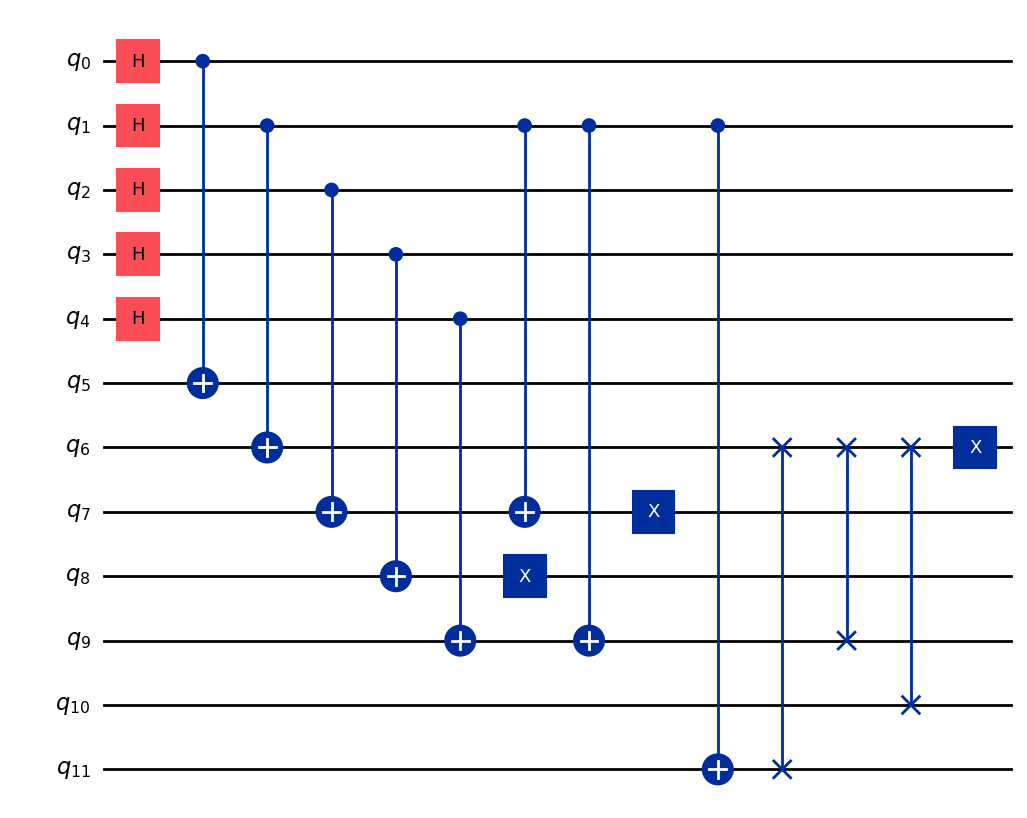

In [23]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(12)
for idx in range(5):
   qc.h(idx)
   qc.cx(idx, idx+5)

qc.cx(1, 7)
qc.x(8)
qc.cx(1, 9)
qc.x(7)
qc.cx(1, 11)
qc.swap(6, 11)
qc.swap(6, 9)
qc.swap(6, 10)
qc.x(6)
qc.draw('mpl')

In [24]:
# 当只有量子比特，量子寄存器时，电路的宽度和量子比特数是一样的
print(qc.num_qubits)
print(qc.width())
# 获取门的类型和数量
print(qc.count_ops())
# 直接获取所有的操作数量
print(qc.size())

12
12


深度的衡量
深度 = 1：所有门都可以在同一时间步并行执行
由于量子门的实现需要时间，因此电路的深度大致相当于量子计算机执行该电路所需的时间。
如果电路包含控制流操作，则此操作定义不明确。

In [25]:
from qiskit.circuit import QuantumCircuit
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0, 1)
qc.h(2)
qc.cx(2, 3)
assert qc.depth() == 2

## Instruction-like methods
control
repeat
power
inverse
reverse_ops

## Parameter类
编译时的符号参数，用于创建参数化量子电路。
参数值必须在电路开始执行前完全确定
不能运行时动态改变

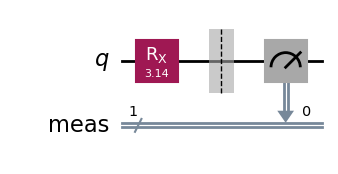

In [1]:
from qiskit.circuit import QuantumCircuit, Parameter
 
# create the parameter
phi = Parameter('phi')
qc = QuantumCircuit(1)
 
# parameterize the rotation
qc.rx(phi, 0)
qc.draw('mpl')
 
# bind the parameters after circuit to create a bound circuit
bc = qc.assign_parameters({phi: 3.14})
bc.measure_all()
bc.draw('mpl')

# NEW————电路的序列化和反序列化

序列化（Serialization）
将对象转换为可存储或传输的格式的过程
例子：把Python对象 → JSON字符串、二进制数据等

反序列化（Deserialization）
将序列化后的数据恢复为原始对象的过程
例子：把JSON字符串 → Python对象

为什么需要序列化？
数据持久化：保存到文件/数据库
网络传输：通过网络发送数据

对于量子数据，Qiskit有自己的二进制文件：QPY
通过load和dump来加载和保存

In [ ]:
from qiskit import qpy
# return：读取 qpy 的内容并从文件中返回 QuantumCircuit 对象列表
# bell.qpy：包含电路的 QPY 二进制数据的文件
with open('bell.qpy', 'rb') as fd:
    circuits = qpy.load(fd)

In [ ]:
# 将 QPY 二进制数据写入文件 此函数用于将电路保存到文件中，以供后续使用或在机器之间传输。QPY 格式向后兼容，并可在 Qiskit 的未来版本中加载。
from qiskit.circuit import QuantumCircuit
from qiskit import qpy
 
qc = QuantumCircuit(2, name='Bell', metadata={'test': True})
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
with open('bell.qpy', 'wb') as fd:
    qpy.dump(qc, fd)

## OpenQASM 3 代码的转化

将 QuantumCircuit class转换为OpenQASM 3 代码
dump() - 导出到文件
dumps() - 导出到字符串,在程序中直接使用 OpenQASM 3 代码，或快速查看
Importing from OpenQASM 3
目前仅提供两个高级函数，因为 Qiskit 对从 OpenQASM 3 导入的支持尚处于起步阶段，并且预计实现方式将发生重大变化。这两个函数是 load() 和 loads()，它们与 dump() 和 dumps() 直接对应，分别用于从指定文件间接加载程序和从给定字符串直接加载程序。

由于我们仍处于探索性发布阶段，因此要使用这两个函数，必须安装 qiskit_qasm3_import 软件包

# NEW————注释

自定义注释子类，注释类旨在被子类化。子类必须设置其命名空间字段。该字段可以是特定于实例的，也可以是整个子类的静态字段。命名空间用作调度机制的一部分

电路相等性检查还会以顺序相关的方式比较对象上的注释。可以在任何子类上实现 __eq__() 魔术方法。

如果希望注释能够通过 QPY 或 OpenQASM 3 <qiskit-qasm3> 进行序列化，则必须提供序列化和反序列化方法的单独实现

注释代表完全自定义的数据，这些数据在编译后仍会保留。这可能包括需要序列化以供后续使用的数据，例如由后端编译器解释的附加数据。

在 OpenQASM 3（ qiskit.qasm3）中，注释是一项核心语言功能，Qiskit 对 OpenQASM 3 的导入/导出支持也包含注释的序列化。

注释的序列化和反序列化由自定义对象处理，这些对象必须在相关序列化函数的接口点传递。例如，在 QPY 中，qpy.dump() 和 qpy.load() 中的annotation_factories参数用于传递序列化器。

## decompose

分解复杂的门操作
参数：
1. gates_to_decompose (分解目标)： 指定要分解哪些门。这是一个非常灵活的参数。
None (默认值)： 分解电路中所有可以被分解的复合门。
字符串 (如 'h')： 分解所有名称为此字符串的门（例如所有 H 门）。
门类 (如 HGate)： 分解所有属于此类型的门。
门标签 (如 'My H Gate')： 分解所有拥有此标签的门（需要在添加门时指定了 label）。
列表： 上述任意类型的组合，例如 [‘h’, ‘cx’] 或 [HGate, ‘my_label’]。

2. reps (重复次数)： 指定分解的“深度”或“层数”。
1 (默认值)： 只分解一层。如果一个门被分解后，其子电路中仍然包含可分解的复合门，这些门将保持不变。
n (n > 1)： 连续执行 n 次分解，直到电路达到指定的层级深度。例如，reps=2 等价于连续调用两次 decompose()。



## barrier()

1. 可视化与调试：这是最常用的场景。在绘制电路图时，barrier 可以帮助你将不同的算法阶段（如初始化、 oracle、扩散操作等）清晰地分开，使电路图更易读、更易于理解。

2. 防止非预期的编译器优化：量子编译器为了提升电路的执行效率和保真度，会自动对电路门进行优化，例如合并相邻的旋转门、重新排列互不影响的量子门等。插入 barrier 可以阻止这种优化跨越屏障，确保屏障前后的操作严格按照你编写的顺序执行。这在测试和教学时非常有用，可以确保你看到的电路就是你实际构建的电路。